In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Google Colab /ANN/Data Sets /BreastcancerData.csv')
del data['Unnamed: 32']
X = data.iloc[:,2:]
Y = data.iloc[:,1]
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
Y = labelencoder_X_1.fit_transform(Y)
Y

from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1,random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)








In [4]:
import keras 
from keras.models import Sequential 
from keras.layers import Dense, Dropout, LeakyReLU, ReLU ,PReLU, ELU



In [5]:
#initializing an ANN
classifier = Sequential()
classifier.add(Dense(units=16,kernel_initializer='he_uniform', activation='relu',input_dim=30))
classifier.add(Dropout(rate=0.1))
classifier.add(Dense(units=16, kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dropout(rate=0.1))
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))
classifier.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [32]:
#fitting the ANN into train data
model_history = classifier.fit(X_train,Y_train, validation_split=0.33,batch_size=1, epochs=150)

Epoch 1/150
343/343 [==============================] - 1s 3ms/step - loss: 0.0039 - accuracy: 0.9971 - val_loss: 3.5271e-06 - val_accuracy: 1.0000
Epoch 2/150
343/343 [==============================] - 1s 3ms/step - loss: 9.1232e-04 - accuracy: 1.0000 - val_loss: 2.6364e-06 - val_accuracy: 1.0000
Epoch 3/150
343/343 [==============================] - 1s 2ms/step - loss: 7.4000e-04 - accuracy: 1.0000 - val_loss: 2.6954e-06 - val_accuracy: 1.0000
Epoch 4/150
343/343 [==============================] - 1s 2ms/step - loss: 7.4393e-05 - accuracy: 1.0000 - val_loss: 2.5231e-06 - val_accuracy: 1.0000
Epoch 5/150
343/343 [==============================] - 1s 2ms/step - loss: 6.4666e-05 - accuracy: 1.0000 - val_loss: 2.3939e-06 - val_accuracy: 1.0000
Epoch 6/150
343/343 [==============================] - 1s 2ms/step - loss: 2.7608e-05 - accuracy: 1.0000 - val_loss: 2.3500e-06 - val_accuracy: 1.0000
Epoch 7/150
343/343 [==============================] - 1s 2ms/step - loss: 4.4938e-04 - accuracy: 

In [28]:
Y_pred = classifier.predict(X_test)
Y_pred = (Y_pred > 0.5)

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)
print("Accuracy of the model is {}%".format(((cm[0][0] + cm[1][1])/57)*100))

Accuracy of the model is 100.0%


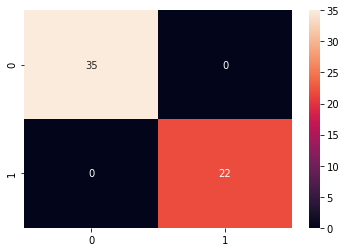

In [33]:
sns.heatmap(cm,annot=True)
plt.savefig('h.png')

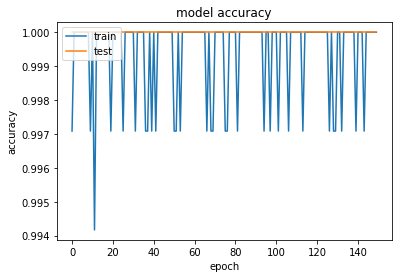

In [34]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()